In [45]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
train  = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_features.csv')
label = pd.read_csv('./sample_submission.csv')
print(f'train:{train.shape}')
print(f'test:{test.shape}')
print(f'label:{label.shape}')

train:(113, 22)
test:(33, 21)
label:(33, 2)


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [39]:
train['poi'] = train['poi'].map(lambda x : int(x))
train_num = len(train)
Y = train['poi']
df = pd.concat([train.drop(['poi'] , axis=1) , test])
df['bonus'] = df['bonus'].fillna(0)

In [40]:
df.describe()

bonus  deferral_payments  deferred_income  director_fees  \
count  1.460000e+02       3.900000e+01     4.900000e+01   1.700000e+01   
mean   1.333474e+06       1.642674e+06    -1.140475e+06   1.668049e+05   
std    8.094029e+06       5.161930e+06     4.025406e+06   3.198914e+05   
min    0.000000e+00      -1.025000e+05    -2.799289e+07   3.285000e+03   
25%    0.000000e+00       8.157300e+04    -6.948620e+05   9.878400e+04   
50%    3.000000e+05       2.274490e+05    -1.597920e+05   1.085790e+05   
75%    8.000000e+05       1.002672e+06    -3.834600e+04   1.137840e+05   
max    9.734362e+07       3.208340e+07    -8.330000e+02   1.398517e+06   

       exercised_stock_options      expenses  from_messages  \
count             1.020000e+02  9.500000e+01      86.000000   
mean              5.987054e+06  1.087289e+05     608.790698   
std               3.106201e+07  5.335348e+05    1841.033949   
min               3.285000e+03  1.480000e+02      12.000000   
25%               5.278862e+05  2.261400e+04      22.750000   
50%               1.310814e+06  4.695000e+04      41.000000   
75%               2.547724e+06  7.995250e+04     145.500000   
max               3.117640e+08  5.235198e+06   14368.000000   

       from_poi_to_this_person  from_this_person_to_poi  loan_advances  \
count                86.000000                86.000000   4.000000e+00   
mean                 64.895349                41.232558   4.196250e+07   
std                  86.979244               100.073111   4.708321e+07   
min                   0.000000                 0.000000   4.000000e+05   
25%                  10.000000                 1.000000   1.600000e+06   
50%                  35.000000                 8.000000   4.176250e+07   
75%                  72.250000                24.750000   8.212500e+07   
max                 528.000000               609.000000   8.392500e+07   

       long_term_incentive         other  restricted_stock  \
count         6.600000e+01  9.300000e+01      1.100000e+02   
mean          1.470361e+06  9.190650e+05      2.321741e+06   
std           5.942759e+06  4.589253e+06      1.251828e+07   
min           6.922300e+04  2.000000e+00     -2.604490e+06   
25%           2.812500e+05  1.215000e+03      2.540180e+05   
50%           4.420350e+05  5.238200e+04      4.517400e+05   
75%           9.386720e+05  3.620960e+05      1.002370e+06   
max           4.852193e+07  4.266759e+07      1.303223e+08   

       restricted_stock_deferred        salary  shared_receipt_with_poi  \
count               1.800000e+01  9.500000e+01                86.000000   
mean                1.664106e+05  5.621943e+05              1176.465116   
std                 4.201494e+06  2.716369e+06              1178.317641   
min                -7.576788e+06  4.770000e+02                 2.000000   
25%                -3.896218e+05  2.118160e+05               249.750000   
50%                -1.469750e+05  2.599960e+05               740.500000   
75%                -7.500975e+04  3.121170e+05              1888.250000   
max                 1.545629e+07  2.670423e+07              5521.000000   

        to_messages  total_payments  total_stock_value  
count     86.000000    1.250000e+02       1.260000e+02  
mean    2073.860465    5.081526e+06       6.773957e+06  
std     2582.700981    2.906172e+07       3.895777e+07  
min       57.000000    1.480000e+02      -4.409300e+04  
25%      541.250000    3.944750e+05       4.945102e+05  
50%     1211.000000    1.101393e+06       1.102872e+06  
75%     2634.750000    2.093263e+06       2.949847e+06  
max    15149.000000    3.098866e+08       4.345095e+08

/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

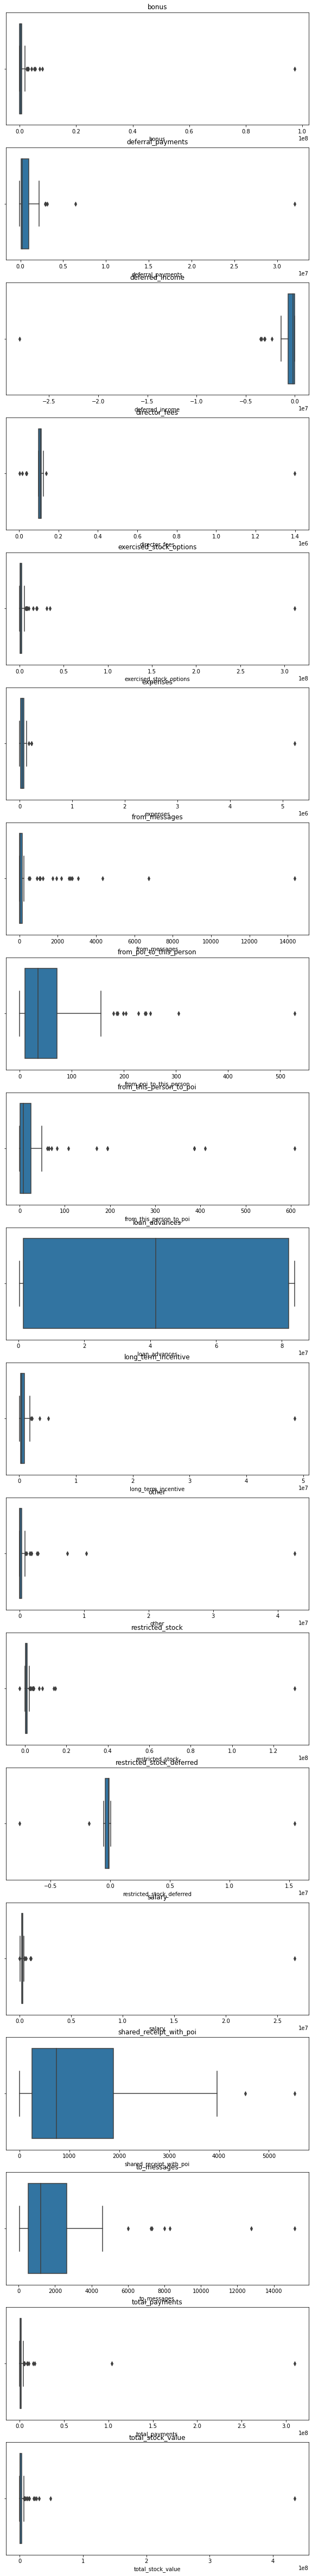

In [46]:
a = 1
plt.figure(figsize=(10 , 100))
for i in df.columns :
    if i not in ['name' , 'email_address']:
        a += 1
        plt.subplot(22 , 1 , a )
        sns.boxplot(df[i])
        plt.title(i)
plt.show()

In [55]:
#用IQR找出極端值 加以標註
def outler_x(x , upper , lower):
    if x > upper or x < lower :
        return 1
    else:
        return 0

for i in df.columns :
    if df[i].dtype in ['float64' , 'int64']:
        IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
        upper = df[i].quantile(0.75) + (IQR * 1.5 )
        lower = df[i].quantile(0.25) - (IQR * 1.5 )
        df[f'{i}_outler'] = df[i].map(lambda x :outler_x(x , upper , lower))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              146 non-null    object 
 1   bonus                             146 non-null    float64
 2   deferral_payments                 39 non-null     float64
 3   deferred_income                   49 non-null     float64
 4   director_fees                     17 non-null     float64
 5   email_address                     111 non-null    object 
 6   exercised_stock_options           102 non-null    float64
 7   expenses                          95 non-null     float64
 8   from_messages                     86 non-null     float64
 9   from_poi_to_this_person           86 non-null     float64
 10  from_this_person_to_poi           86 non-null     float64
 11  loan_advances                     4 non-null      float64
 12  long_term

In [59]:
#補值
zero_na = ['deferral_payments' , 'deferred_income' , 'director_fees' , 'exercised_stock_options' , 'from_poi_to_this_person'
          , 'from_this_person_to_poi' , 'loan_advances' , 'long_term_incentive' , 'other' , 'restricted_stock' , 'restricted_stock_deferred'
          ,'shared_receipt_with_poi']
zero_columns = []
mean_columns =[]
for i in df.columns :
    if df[i].dtype in ['float64' , 'int64']:
        if i in zero_na:
            zero_columns.append(i)
            df[i] = df[i].fillna(0)
        else:
            mean_columns.append(i)
            df[i] = df[i].fillna(df[i].mean())
print(f'zero_num:{len(zero_columns)} , zero_na:{zero_columns}')
print('-'*20)
print(f'mean_num:{len(mean_columns)} , mean_na:{mean_columns}')

zero_num:12 , zero_na:['deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'shared_receipt_with_poi']
--------------------
mean_num:26 , mean_na:['bonus', 'expenses', 'from_messages', 'salary', 'to_messages', 'total_payments', 'total_stock_value', 'bonus_outler', 'deferral_payments_outler', 'deferred_income_outler', 'director_fees_outler', 'exercised_stock_options_outler', 'expenses_outler', 'from_messages_outler', 'from_poi_to_this_person_outler', 'from_this_person_to_poi_outler', 'loan_advances_outler', 'long_term_incentive_outler', 'other_outler', 'restricted_stock_outler', 'restricted_stock_deferred_outler', 'salary_outler', 'shared_receipt_with_poi_outler', 'to_messages_outler', 'total_payments_outler', 'total_stock_value_outler']


In [67]:
z_score = StandardScaler()
st_df = z_score.fit_transform(df.drop(['name' , 'email_address'] , axis=1))
st_df.shape

(146, 38)

/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

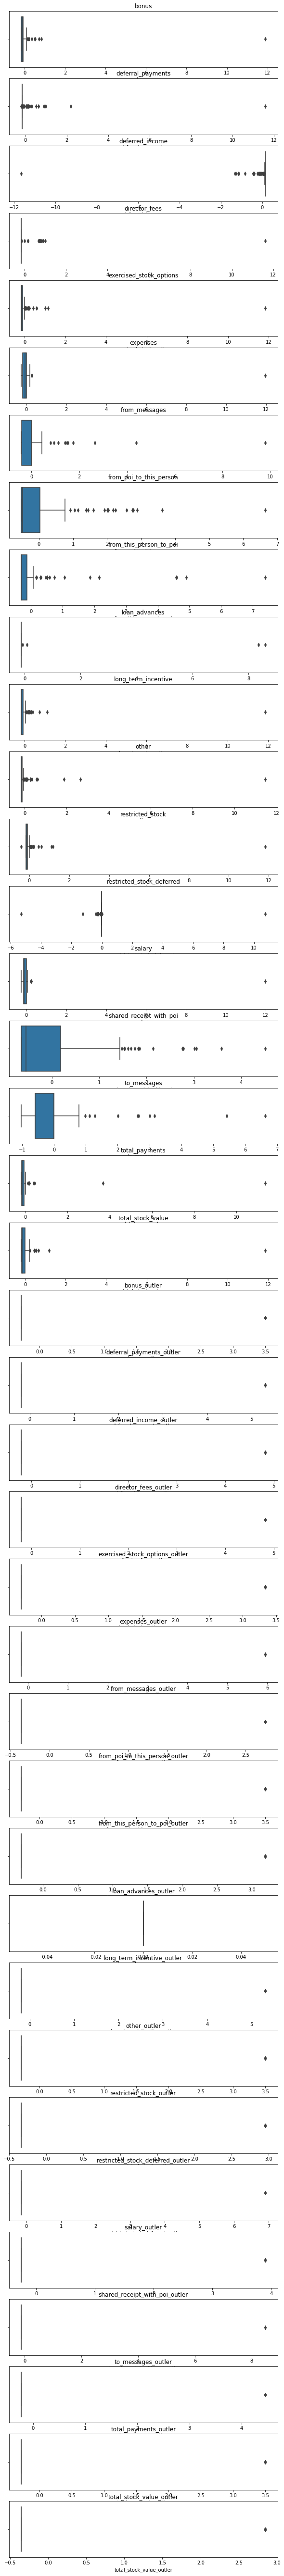

In [80]:
c_name = df.drop(['name' , 'email_address'] , axis=1).columns
new_df = pd.DataFrame(data = st_df , columns=c_name)
a = 1
plt.figure(figsize=(10 , 100))
for i in new_df.columns :
    if i not in ['name' , 'email_address']:
        a += 1
        plt.subplot(39 , 1 , a )
        sns.boxplot(new_df[i])
        plt.title(i)
plt.show()

In [82]:
X = new_df[:train_num]
out_test = new_df[train_num:]
X_train , X_test , y_train , y_test = train_test_split(X , Y , train_size=0.8 , random_state=1)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test , y_pred))
cross_val_score(model ,X , Y , cv=10 , scoring='accuracy').mean()

0.8695652173913043


0.8946969696969695

In [90]:
test_pred = model.predict_proba(out_test)
sub = pd.DataFrame({'name':test['name'] , 'poi':test_pred[:,1]})
sub.to_csv('./std_result_gdbt.csv' , index=False)

In [91]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier(random_state=1)
n_estimators=[i for i in range(100 , 300 , 10)]
learning_rate=[0.1 , 0.01 , 0.05 ,0.05 , 0.8 ,0.08]
max_depth = [i for i in range(3 , 10 , 1)]
parm_grid = dict(n_estimators=n_estimators , max_depth=max_depth , learning_rate=learning_rate)
GSV = GridSearchCV(model , param_grid=parm_grid , scoring='accuracy' , n_jobs=-1 ,verbose=1)
GSV_result = GSV.fit(X_train , y_train)
print(f'score: , {GSV_result.best_score_} , useing:, {GSV_result.best_params_}')

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
score: , 0.888888888888889 , useing:, {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [100]:
new_model = GradientBoostingClassifier(random_state=1 , learning_rate=0.01)
new_model.fit(X_train , y_train)
y_pred = new_model.predict(X_test)
print(accuracy_score(y_test , y_pred))
cross_val_score(model ,X , Y , cv=10 , scoring='accuracy').mean()

0.9130434782608695


0.8946969696969695

In [102]:
test_pred = new_model.predict_proba(out_test)
sub = pd.DataFrame({'name' : test['name'] , 'poi':test_pred[: , 1]})
sub

name       poi
0       BELDEN TIMOTHY N  0.369396
1     BOWEN JR RAYMOND M  0.134331
2         HANNON KEVIN P  0.439959
3       DELAINEY DAVID W  0.103709
4       CAUSEY RICHARD A  0.249069
5       HICKERSON GARY J  0.123714
6         FREVERT MARK A  0.683795
7            CHAN RONNIE  0.096441
8   DONAHUE JR JEFFREY M  0.096097
9      REYNOLDS LAWRENCE  0.230861
10      HORTON STANLEY C  0.050861
11         LEWIS RICHARD  0.050861
12    SHERRICK JEFFREY B  0.050861
13        MEYER JEROME J  0.050861
14   DERRICK JR. JAMES V  0.683795
15              PIRO JIM  0.050861
16   DETMERING TIMOTHY J  0.212943
17     KISHKILL JOSEPH G  0.050861
18        BAY FRANKLIN R  0.199592
19        PRENTICE JAMES  0.050861
20                 TOTAL  0.683795
21        FALLON JAMES B  0.123714
22            METTS MARK  0.055763
23         WODRASKA JOHN  0.050861
24   MORDAUNT KRISTINA M  0.050861
25      CARTER REBECCA C  0.096441
26      BHATNAGAR SANJAY  0.050861
27      WALTERS GARETH W  0.050861
28       BIBI PHILIPPE A  0.055763
29       SHERRIFF JOHN R  0.117927
30          GIBBS DANA R  0.050861
31        LINDHOLM TOD A  0.050861
32       MCMAHON JEFFREY  0.303700

In [103]:
sub.to_csv('./GSV_result.csv' , index=False)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
GDBT = GradientBoostingClassifier(learning_rate=0.01 , random_state=1)
rf = RandomForestClassifier(n_estimators=100)
LOG = LogisticRegression(C=0.3)

meta_estimator = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)
stacking = StackingClassifier(classifiers=[GDBT , rf , LOG] , meta_classifier=meta_estimator , 
                              use_probas=True , average_probas=False)

stacking.fit(X_train , y_train)
y_pred = stacking.predict(X_test)
print(accuracy_score(y_test , y_pred))
cross_val_score(stacking ,X , Y , cv=10 , scoring='accuracy').mean()

0.8695652173913043


0.8856060606060605